In [80]:

import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import seaborn as sb
import statsmodels.api as sm
from statsmodels.formula.api import ols


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6966c67d5a0f4111a5fc3fef91d0be04 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7OLR7oofr_cjr8H6ZSxPWWt7gGO-iZ-XfNXBHDh4V0wI',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6966c67d5a0f4111a5fc3fef91d0be04.get_object(Bucket='ds320project1-donotdelete-pr-za1fxqljqqzmub',Key='ObesityDataSet_raw_and_data_sinthetic.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
    
#Dataset (UCI Machine Learning Repository):
#https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+ 

#Attributes information: https://www.sciencedirect.com/science/article/pii/S2352340919306985#kwrds0010

#Eating habits are:
 #Frequent consumption of high caloric food (FAVC)
 #Frequency of consumption of vegetables (FCVC) 
 #Number of main meals (NCP)
 #Consumption of food between meals (CAEC)
 #Consumption of water daily (CH20)
 #Consumption of alcohol (CALC).

#Physical condition are:
 #Calories consumption monitoring (SCC)
 #Physical activity frequency (FAF)
 #Time using technology devices (TUE)
 #Transportation used (MTRANS)

#Other variables :
 #Gender, Age, Height and Weight.


obesity = pd.read_csv(body)
obesity.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:

obesity.info() # is an  overview of the dataset's datatypes, number of columns and indexes.We can see that there are no missing values and that our data 16 columns are a mix of float (8)and object(9) columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
#Statical summary of the numerical columns, that shows the count of 2111 rows among all numerical columns and shows the mean, standard deviation, minimum, maximum, 1st quartile,2nd quartile, and 3rd quartile.
obesity.describe() 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
# Summary of the categorical columns
obesity.select_dtypes(include=['object']).describe() 

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [5]:
# The statical summary of the categorical columns shows the count of 2111 rows among all numerical columns. There are two unique values in Gender, FAVC, SMOKE,  SCC, and Family_History_With_Overweight.
#Four unique values in CAEC and CALC. Five values in MTRANS, and seven unique values in NObeyesdad.The summary also includes the top values in each column and its frequency value. 
   #For example, in Nobeyesdad, the top unique value is Obesity_Type_I and has occurred 351 times.  

In [6]:
# Let's find unique values from each categorical column

In [7]:
list(obesity["Gender"].unique())

['Female', 'Male']

In [8]:
list(obesity["family_history_with_overweight"].unique())

['yes', 'no']

In [9]:
list(obesity["FAVC"].unique())

['no', 'yes']

In [10]:
list(obesity["CAEC"].unique())

['Sometimes', 'Frequently', 'Always', 'no']

In [11]:
list(obesity["SMOKE"].unique())

['no', 'yes']

In [12]:
list(obesity["SCC"].unique())

['no', 'yes']

In [13]:
list(obesity["CALC"].unique())

['no', 'Sometimes', 'Frequently', 'Always']

In [14]:
list(obesity["MTRANS"].unique())

['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']

In [15]:
list(obesity["NObeyesdad"].unique())

['Normal_Weight',
 'Overweight_Level_I',
 'Overweight_Level_II',
 'Obesity_Type_I',
 'Insufficient_Weight',
 'Obesity_Type_II',
 'Obesity_Type_III']

In [16]:
# Rename Nobeyesdad columns to Obesity Levels
obesity.rename(columns = {'NObeyesdad':'Obesity levels'}, inplace = True) 
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity levels
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
# Preparing dataframe to graph the Obesity Levels distribution
grpd = obesity.groupby(['Obesity levels']).size().to_frame('size')
grpd = grpd.transpose()
grpd.head()

Obesity levels,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
size,272,287,351,297,324,290,290


In [18]:
#Visualizing Data using Matplotlib
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


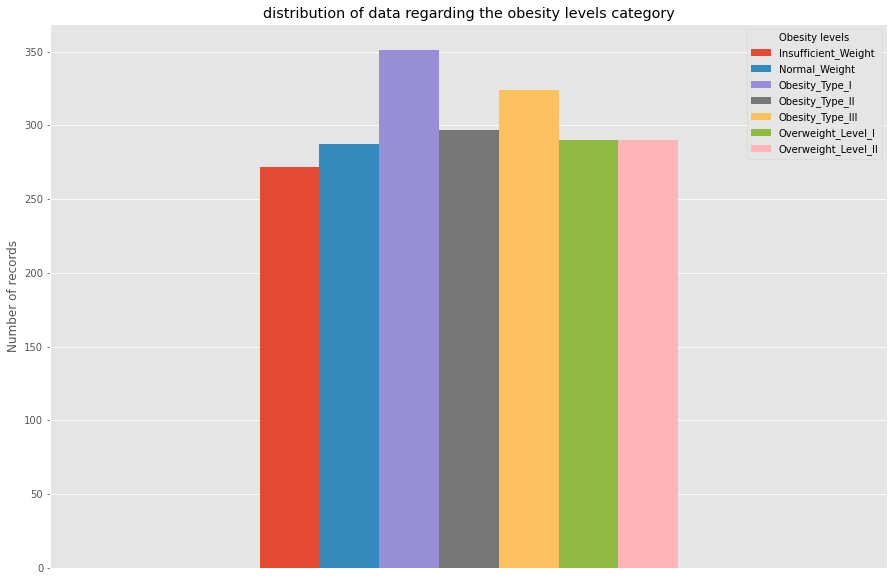

In [19]:
# Distribution of entries for each Obesity level
graph = grpd.plot(kind='bar', figsize=(15, 10))

graph.axes.get_xaxis().set_visible(False)
plt.title('distribution of data regarding the obesity levels category') # add a title to the histogram    
plt.ylabel('Number of records') # add y-label
plt.xlabel('Obesity level categories') # add x-label

plt.show()
 #The data set is unbalanced regarding the amount of entries per unique value in Obesity level column. We need to make sure that the data is balance to ovoid bias. 

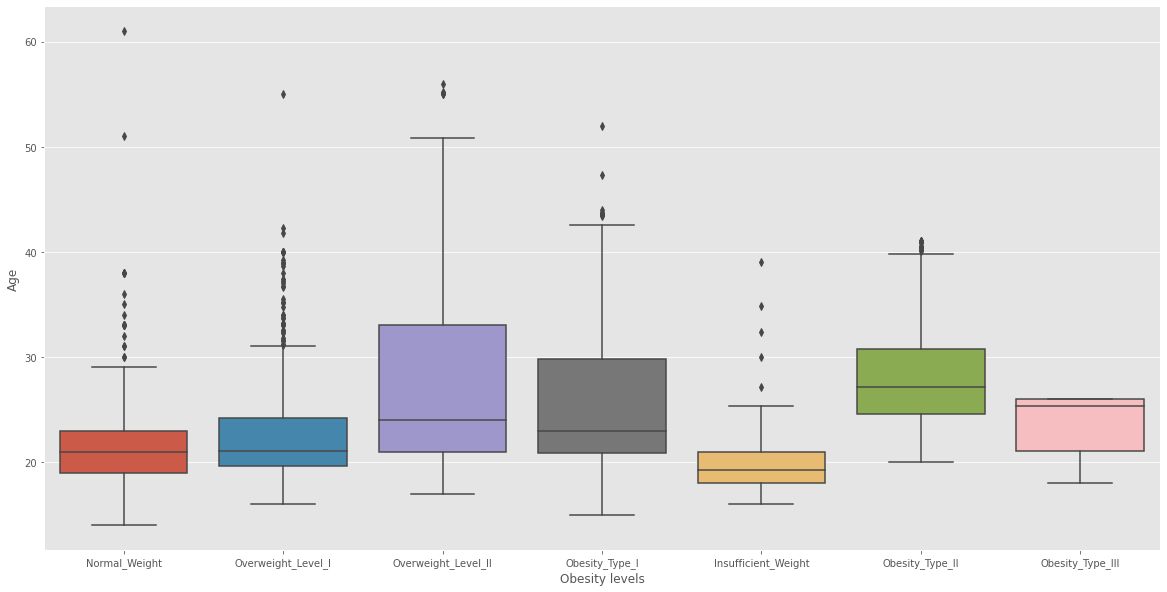

In [20]:
plt.figure(figsize=(20,10))
sb.boxplot(x="Obesity levels",y="Age",data=obesity)

#boxplotshows the distribution of Age by obesity levels.each obesity level have a diferent medians, max, Q3. We can see that there is different distribution among different obesity levels.
#Normal_weight is symmetric. And Overweight_level_I, Overweight_level_II, Obesity_Type_I, Obesity_TypeII, and Insufficient Weightare are all right skewed.While Obesity_Type_III is left skewed.
#We can also observe that there are some outliers in all levels but Obesity_Type_III where the Q3 is the same as max.


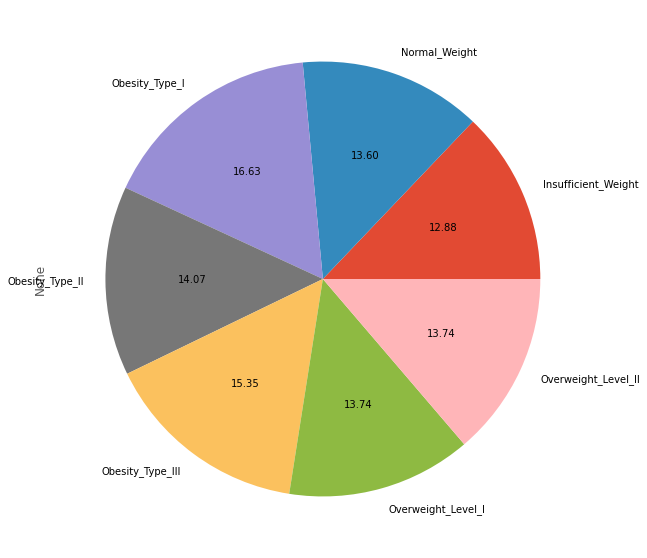

In [21]:
plt.figure(figsize=(20,10))#y is none
obesity.groupby('Obesity levels').size().plot(kind='pie', autopct='%.2f')

#Is a piechart and count of the obesity levels, we can see that the top value in Obesity_Type_I  16.63%, and the smallest value is Insufficient_weight is 12.88%, and the median is Overweight_level_II 13.74%.
#We can see the the is 2.89% (61) difference from median to max and 0.86%(18). There is no much difference between each entries, which mean the unbalance will not cause a bias.


In [22]:
obesity.describe()
#values_counts for categorical attributes
drive_wheels_count=obesity["Obesity levels"].value_counts()
print(drive_wheels_count)



Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Overweight_Level_I     290
Normal_Weight          287
Insufficient_Weight    272
Name: Obesity levels, dtype: int64


In [23]:
# One way Anova test of obesity levels vs all continues columns

import seaborn as sb
import scipy.stats as stat

In [24]:
grouped_test2=obesity[['Obesity levels','Age']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['Age'], 
                             grouped_test2.get_group('Obesity_Type_III')['Age'], 
                             grouped_test2.get_group('Obesity_Type_II')['Age'],
                             grouped_test2.get_group('Overweight_Level_II')['Age'],
                            grouped_test2.get_group('Normal_Weight')['Age'],
                            grouped_test2.get_group('Insufficient_Weight')['Age'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 93.94134207712972 , P = 3.7861154806248437e-88


In [25]:
grouped_test2=obesity[['Obesity levels','Weight']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['Weight'], 
                             grouped_test2.get_group('Obesity_Type_III')['Weight'], 
                             grouped_test2.get_group('Obesity_Type_II')['Weight'],
                             grouped_test2.get_group('Overweight_Level_II')['Weight'],
                            grouped_test2.get_group('Normal_Weight')['Weight'],
                            grouped_test2.get_group('Insufficient_Weight')['Weight'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 2155.1714690926638 , P = 0.0


In [26]:
grouped_test2=obesity[['Obesity levels','FCVC']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['FCVC'], 
                             grouped_test2.get_group('Obesity_Type_III')['FCVC'], 
                             grouped_test2.get_group('Obesity_Type_II')['FCVC'],
                             grouped_test2.get_group('Overweight_Level_II')['FCVC'],
                            grouped_test2.get_group('Normal_Weight')['FCVC'],
                            grouped_test2.get_group('Insufficient_Weight')['FCVC'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 128.9291543894548 , P = 4.543680389950458e-117


In [27]:
grouped_test2=obesity[['Obesity levels','NCP']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['NCP'], 
                             grouped_test2.get_group('Obesity_Type_III')['NCP'], 
                             grouped_test2.get_group('Obesity_Type_II')['NCP'],
                             grouped_test2.get_group('Overweight_Level_II')['NCP'],
                            grouped_test2.get_group('Normal_Weight')['NCP'],
                            grouped_test2.get_group('Insufficient_Weight')['NCP'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 31.476976009593688 , P = 7.958578322486408e-31


In [28]:
grouped_test2=obesity[['Obesity levels','CH2O']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['CH2O'], 
                             grouped_test2.get_group('Obesity_Type_III')['CH2O'], 
                             grouped_test2.get_group('Obesity_Type_II')['CH2O'],
                             grouped_test2.get_group('Overweight_Level_II')['CH2O'],
                            grouped_test2.get_group('Normal_Weight')['CH2O'],
                            grouped_test2.get_group('Insufficient_Weight')['CH2O'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 19.079687489502128 , P = 1.5338338946175934e-18


In [29]:
grouped_test2=obesity[['Obesity levels','FAF']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['FAF'], 
                             grouped_test2.get_group('Obesity_Type_III')['FAF'], 
                             grouped_test2.get_group('Obesity_Type_II')['FAF'],
                             grouped_test2.get_group('Overweight_Level_II')['FAF'],
                            grouped_test2.get_group('Normal_Weight')['FAF'],
                            grouped_test2.get_group('Insufficient_Weight')['FAF'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 20.935221089837214 , P = 2.150307588314657e-20


In [30]:
grouped_test2=obesity[['Obesity levels','TUE']].groupby(['Obesity levels'])
f_val, p_val = stat.f_oneway(grouped_test2.get_group('Obesity_Type_I')['TUE'], 
                             grouped_test2.get_group('Obesity_Type_III')['TUE'], 
                             grouped_test2.get_group('Obesity_Type_II')['TUE'],
                             grouped_test2.get_group('Overweight_Level_II')['TUE'],
                            grouped_test2.get_group('Normal_Weight')['TUE'],
                            grouped_test2.get_group('Insufficient_Weight')['TUE'])
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 9.4764164316254 , P = 6.20345870677878e-09


In [31]:
#The output in all 7 cases shows a p_value > 0.05. This means that the is a relationship between all continues variables and obesity level. Therefore we will keep all attributes. 


In [32]:
obesity.isnull() #Let's see if there are any missing values in the data set.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity levels
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
#The data shows that there are no missing values but we will doublecheck. 
obesity.dropna()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity levels
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [34]:
obesity.shape #There are no missing values in the data set

(2111, 17)

In [35]:
obesity.corr() # It seems that there are no strong correlations between columns, which is good!


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


In [36]:
import pandas as pd
from scipy import stats
#Chi-Square to check the relationship between obesity level & categorical variables:

In [37]:
#Chi-Square to check the relationship between Gender and Obesity levels
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['Gender'])
crosstab
stats.chi2_contingency(crosstab)
#We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Gender and Obisity Levels.

(657.746227342968,
 8.088897293329991e-139,
 6,
 array([[134.38938892, 137.61061108],
        [141.80056845, 145.19943155],
        [173.42160114, 177.57839886],
        [146.74135481, 150.25864519],
        [160.08147797, 163.91852203],
        [143.28280436, 146.71719564],
        [143.28280436, 146.71719564]]))

In [38]:

crosstab = pd.crosstab(obesity['Obesity levels'], obesity['family_history_with_overweight'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between family_history_with_overweight and Obisity Levels.

(621.9794353945298,
 4.2280167944702657e-131,
 6,
 array([[ 49.60682141, 222.39317859],
        [ 52.34249171, 234.65750829],
        [ 64.01468498, 286.98531502],
        [ 54.16627191, 242.83372809],
        [ 59.09047845, 264.90952155],
        [ 52.88962577, 237.11037423],
        [ 52.88962577, 237.11037423]]))

In [39]:
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['FAVC'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between FAVC and Obisity Levels.

(233.34130356133423,
 1.4822362082358762e-47,
 6,
 array([[ 31.56797726, 240.43202274],
        [ 33.30885836, 253.69114164],
        [ 40.73661772, 310.26338228],
        [ 34.46944576, 262.53055424],
        [ 37.60303174, 286.39696826],
        [ 33.65703458, 256.34296542],
        [ 33.65703458, 256.34296542]]))

In [40]:
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['CAEC'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between CAEC and Obisity Levels.

(802.9772817566468,
 7.383852893286775e-159,
 18,
 array([[  6.828991  ,  31.1814306 , 227.41828517,   6.57129323],
        [  7.20558977,  32.90099479, 239.95973472,   6.93368072],
        [  8.81241118,  40.23780199, 293.46991947,   8.47986736],
        [  7.45665561,  34.04737091, 248.32070109,   7.17527238],
        [  8.1345334 ,  37.14258645, 270.89531028,   7.82756987],
        [  7.28090952,  33.24490763, 242.46802463,   7.00615822],
        [  7.28090952,  33.24490763, 242.46802463,   7.00615822]]))

In [41]:
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['SMOKE'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between SMOKE and Obisity Levels.

(32.13783205600177,
 1.5354243135096318e-05,
 6,
 array([[266.33064898,   5.66935102],
        [281.01800095,   5.98199905],
        [343.684036  ,   7.315964  ],
        [290.80956892,   6.19043108],
        [317.24680246,   6.75319754],
        [283.95547134,   6.04452866],
        [283.95547134,   6.04452866]]))

In [42]:
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['SCC'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between SCC and Obisity Levels.

(123.02389868912441,
 3.773175792377203e-24,
 6,
 array([[259.63050687,  12.36949313],
        [273.9483657 ,  13.0516343 ],
        [335.03789673,  15.96210327],
        [283.49360493,  13.50639507],
        [309.26575083,  14.73424917],
        [276.81193747,  13.18806253],
        [276.81193747,  13.18806253]]))

In [43]:
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['CALC'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between CALC and Obisity Levels.

(338.5775202939281,
 5.287157877798321e-61,
 18,
 array([[1.28848887e-01, 9.01942207e+00, 1.80517290e+02, 8.23344387e+01],
        [1.35954524e-01, 9.51681667e+00, 1.90472288e+02, 8.68749408e+01],
        [1.66271909e-01, 1.16390336e+01, 2.32946945e+02, 1.06247750e+02],
        [1.40691615e-01, 9.84841307e+00, 1.97108953e+02, 8.99019422e+01],
        [1.53481762e-01, 1.07437234e+01, 2.15027949e+02, 9.80748460e+01],
        [1.37375651e-01, 9.61629559e+00, 1.92463288e+02, 8.77830412e+01],
        [1.37375651e-01, 9.61629559e+00, 1.92463288e+02, 8.77830412e+01]]))

In [44]:
crosstab = pd.crosstab(obesity['Obesity levels'], obesity['MTRANS'])
crosstab
stats.chi2_contingency(crosstab)
##We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between MTRANS and Obisity Levels.

(292.5939481316799,
 5.1779152038359274e-48,
 24,
 array([[ 58.88394126,   0.90194221,   1.41733775, 203.58124112,
           7.21553766],
        [ 62.13121743,   0.95168167,   1.49549976, 214.8081478 ,
           7.61345334],
        [ 75.98626243,   1.16390336,   1.828991  , 262.7096163 ,
           9.31122691],
        [ 64.29606821,   0.98484131,   1.54760777, 222.29275225,
           7.87873046],
        [ 70.14116532,   1.07437234,   1.68829938, 242.50118427,
           8.59497868],
        [ 62.78067267,   0.96162956,   1.51113216, 217.05352913,
           7.69303648],
        [ 62.78067267,   0.96162956,   1.51113216, 217.05352913,
           7.69303648]]))

In [45]:
#lets get the class label/target attribute
y= obesity['Obesity levels'].astype('category')
y

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: Obesity levels, Length: 2111, dtype: category
Categories (7, object): [Insufficient_Weight, Normal_Weight, Obesity_Type_I, Obesity_Type_II, Obesity_Type_III, Overweight_Level_I, Overweight_Level_II]

In [46]:
#Let's label code the class label/target attribute
y = y.cat.codes
y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Length: 2111, dtype: int8

In [47]:
#Lets get all other attributes beside class label/target attribute out of dataframe
x = obesity.iloc[:, :-1].values
x

array([['Female', 21.0, 1.62, ..., 1.0, 'no', 'Public_Transportation'],
       ['Female', 21.0, 1.52, ..., 0.0, 'Sometimes',
        'Public_Transportation'],
       ['Male', 23.0, 1.8, ..., 1.0, 'Frequently',
        'Public_Transportation'],
       ...,
       ['Female', 22.524036, 1.7522060000000002, ..., 0.646288,
        'Sometimes', 'Public_Transportation'],
       ['Female', 24.361936, 1.73945, ..., 0.5860350000000001,
        'Sometimes', 'Public_Transportation'],
       ['Female', 23.664709, 1.738836, ..., 0.714137, 'Sometimes',
        'Public_Transportation']], dtype=object)

In [48]:
#Converting yes/no columns into binary values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [49]:
family_history = labelencoder.fit_transform(obesity["family_history_with_overweight"])
FAVC = labelencoder.fit_transform(obesity["FAVC"])
SMOKE = labelencoder.fit_transform(obesity["SMOKE"])
SCC = labelencoder.fit_transform(obesity["SCC"])

In [50]:
family_history = pd.DataFrame(family_history).astype(int)
FAVC = pd.DataFrame(FAVC).astype(int)
SMOKE = pd.DataFrame(SMOKE).astype(int)
SCC = pd.DataFrame(SCC).astype(int)

In [51]:
#Converting all categorical columns in term of one hot encoding 
from sklearn.preprocessing import OneHotEncoder

In [52]:
gender = OneHotEncoder().fit_transform(obesity[['Gender']]).toarray()
CAEC = OneHotEncoder().fit_transform(obesity[['CAEC']]).toarray()
CALC = OneHotEncoder().fit_transform(obesity[['CALC']]).toarray()
MTRANS = OneHotEncoder().fit_transform(obesity[['MTRANS']]).toarray()

In [53]:
gender = pd.DataFrame(gender).astype(int)
CAEC = pd.DataFrame(CAEC).astype(int)
CALC = pd.DataFrame(CALC).astype(int)
MTRANS = pd.DataFrame(MTRANS).astype(int)

In [54]:
# Let's combine all the new dataframes (hot encoded and labeled) into a new single dataframe
obesity_DF = pd.concat([gender, obesity["Age"], obesity["Height"], obesity["Weight"], family_history, FAVC, obesity["FCVC"], obesity["NCP"], CAEC, SMOKE, obesity["CH2O"], SCC, obesity["FAF"], obesity["TUE"], CALC, MTRANS], axis=1)
obesity_DF.head()


,0,1,Age,Height,Weight,0,0,FCVC,NCP,0,...,TUE,0,1,2,3,0,1,2,3,4
0,1,0,21.0,1.62,64.0,1,0,2.0,3.0,0,...,1.0,0,0,0,1,0,0,0,1,0
1,1,0,21.0,1.52,56.0,1,0,3.0,3.0,0,...,0.0,0,0,1,0,0,0,0,1,0
2,0,1,23.0,1.80,77.0,1,0,2.0,3.0,0,...,1.0,0,1,0,0,0,0,0,1,0
3,0,1,27.0,1.80,87.0,0,0,3.0,3.0,0,...,0.0,0,1,0,0,0,0,0,0,1
4,0,1,22.0,1.78,89.8,0,0,2.0,1.0,0,...,0.0,0,0,1,0,0,0,0,1,0


In [55]:
#Let's assign obesity_Df dataframe to X
x = obesity_DF.values
x

array([[ 1.      ,  0.      , 21.      , ...,  0.      ,  1.      ,
         0.      ],
       [ 1.      ,  0.      , 21.      , ...,  0.      ,  1.      ,
         0.      ],
       [ 0.      ,  1.      , 23.      , ...,  0.      ,  1.      ,
         0.      ],
       ...,
       [ 1.      ,  0.      , 22.524036, ...,  0.      ,  1.      ,
         0.      ],
       [ 1.      ,  0.      , 24.361936, ...,  0.      ,  1.      ,
         0.      ],
       [ 1.      ,  0.      , 23.664709, ...,  0.      ,  1.      ,
         0.      ]])

In [56]:
"""
Dividing your data into test and train set is known as smapling. Here are types of sampling:
1- Random sampling
2- Smapling with replacement
3- Sampling without replacement
4- Stratified Sampling

Readings https://www.questionpro.com/blog/types-of-sampling-for-social-research/
"""

'\nDividing your data into test and train set is known as smapling. Here are types of sampling:\n1- Random sampling\n2- Smapling with replacement\n3- Sampling without replacement\n4- Stratified Sampling\n\nReadings https://www.questionpro.com/blog/types-of-sampling-for-social-research/\n'

In [57]:
# Applying data sampling with (80:20) ratio
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1688, 27) (1688,)
Test set: (423, 27) (423,)


In [58]:
# Training our model using tree based classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [59]:
y_predict=clf.predict(x_test)
y_predict
#Y_predict shows the numbers of obesity levels that model takes 0 is Insufficient_Weigh and 6 is Overweight_Level_II.

array([5, 3, 1, 6, 5, 0, 3, 6, 4, 6, 3, 6, 2, 0, 2, 3, 6, 4, 5, 4, 0, 0,
       6, 3, 5, 2, 4, 6, 6, 5, 1, 6, 2, 3, 3, 4, 6, 1, 6, 6, 4, 1, 6, 5,
       3, 2, 0, 0, 3, 6, 3, 3, 3, 2, 6, 4, 3, 2, 6, 1, 2, 2, 0, 4, 5, 1,
       0, 3, 0, 4, 4, 2, 4, 6, 3, 0, 3, 0, 5, 2, 6, 2, 2, 0, 0, 6, 1, 3,
       6, 4, 3, 4, 2, 2, 4, 5, 3, 2, 3, 1, 0, 5, 1, 4, 6, 0, 5, 2, 0, 3,
       4, 4, 2, 3, 4, 4, 6, 1, 1, 5, 2, 4, 3, 3, 1, 6, 3, 6, 4, 5, 1, 1,
       5, 4, 3, 6, 6, 6, 4, 5, 5, 3, 2, 3, 6, 4, 1, 6, 4, 4, 5, 5, 4, 4,
       6, 3, 0, 0, 3, 1, 4, 6, 3, 5, 2, 2, 5, 4, 2, 4, 3, 5, 5, 1, 3, 4,
       4, 5, 3, 3, 1, 4, 5, 6, 2, 2, 6, 3, 4, 4, 3, 5, 2, 6, 1, 1, 1, 1,
       1, 2, 3, 3, 0, 4, 6, 5, 0, 5, 4, 4, 2, 6, 2, 5, 6, 5, 4, 2, 0, 3,
       2, 2, 1, 4, 1, 1, 5, 6, 5, 5, 0, 6, 2, 0, 0, 2, 4, 3, 0, 1, 5, 2,
       6, 1, 6, 4, 2, 0, 4, 4, 6, 3, 3, 3, 3, 6, 3, 3, 1, 0, 1, 0, 0, 5,
       4, 2, 3, 1, 3, 4, 5, 0, 5, 2, 6, 1, 0, 6, 3, 3, 4, 2, 1, 6, 1, 3,
       2, 6, 3, 5, 4, 5, 4, 1, 1, 6, 1, 2, 4, 2, 0,

In [60]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  0.9361702127659575


In [ ]:
#The Tree base model metrics accuracy evaluation give us a Train set Accuracy:  1.0 and Test set Accuracy:  0.9361702127659575.

In [61]:
#Confusion matrix evaluation shows in row one (0)the model predicted 49 right, in the 2nd row(1) predicted 46 right and so on.
from sklearn.metrics import confusion_matrix
labels=[0,1,2,3,4,5,6]
cm=confusion_matrix(y_test,y_predict,labels)
print(cm)

[[49  3  0  0  0  0  0]
 [ 3 46  0  0  0  9  0]
 [ 0  0 59  3  0  0  0]
 [ 0  0  1 66  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  4  0  0  0 44  1]
 [ 0  0  3  0  0  0 63]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [62]:
#K nearest neighbor (K-NN) based classifier
from sklearn.neighbors import KNeighborsClassifier
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [63]:
#Predicting
yhat = neigh.predict(x_test)
yhat
#yhat shows the numbers of obesity levels that model predicted.
#These are the obesity level and their code number: 0-Insufficient_Weight, 1- Normal_Weight, 2- Obesity_Type_I, 3-Obesity_Type_II, 4-Obesity_Type_III, 5-Overweight_Level_I, 6-Overweight_Level_II.

array([5, 3, 1, 6, 0, 0, 2, 6, 4, 6, 3, 6, 2, 0, 2, 3, 6, 4, 5, 4, 0, 0,
       3, 3, 5, 2, 4, 5, 6, 5, 1, 6, 2, 3, 3, 4, 6, 1, 6, 6, 4, 1, 6, 5,
       3, 2, 0, 0, 3, 6, 3, 3, 3, 2, 6, 4, 3, 2, 6, 1, 2, 2, 0, 4, 6, 1,
       0, 3, 0, 4, 3, 2, 4, 6, 3, 0, 3, 0, 5, 2, 5, 2, 2, 0, 0, 6, 5, 3,
       6, 4, 3, 4, 2, 2, 4, 1, 3, 2, 3, 5, 0, 6, 1, 4, 6, 0, 5, 2, 0, 3,
       4, 4, 2, 3, 4, 4, 6, 1, 1, 1, 2, 4, 3, 3, 0, 6, 3, 6, 4, 5, 1, 5,
       5, 4, 3, 6, 5, 6, 4, 1, 5, 3, 2, 3, 6, 4, 0, 5, 4, 4, 5, 5, 4, 4,
       6, 3, 0, 0, 3, 1, 4, 6, 3, 1, 6, 2, 5, 4, 2, 4, 3, 5, 5, 0, 3, 4,
       4, 5, 3, 3, 0, 4, 5, 6, 2, 2, 6, 3, 4, 4, 3, 5, 2, 6, 5, 5, 1, 0,
       0, 2, 3, 3, 0, 4, 5, 1, 0, 5, 4, 4, 2, 6, 2, 1, 6, 5, 4, 2, 0, 3,
       2, 2, 1, 4, 1, 1, 5, 6, 1, 2, 0, 6, 2, 0, 0, 2, 4, 2, 0, 1, 5, 2,
       6, 1, 6, 4, 2, 0, 4, 4, 6, 2, 3, 3, 3, 6, 3, 3, 1, 0, 1, 1, 0, 5,
       4, 2, 3, 5, 3, 4, 5, 0, 1, 2, 6, 0, 0, 6, 3, 3, 4, 2, 0, 6, 5, 3,
       2, 6, 3, 6, 4, 5, 4, 5, 0, 6, 1, 2, 4, 2, 0,

In [64]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9235781990521327
Test set Accuracy:  0.8888888888888888


In [ ]:
# when K=4  Train set Accuracy evaluation is 0.923 and Test set Accuracy is 0.888

In [65]:
#Confusion matrix is another handy evaluation of model
from sklearn.metrics import confusion_matrix
labels=[0,1,2,3,4,5,6]
cm=confusion_matrix(y_test,yhat,labels)
print(cm)

[[52  0  0  0  0  0  0]
 [13 33  0  0  0  8  4]
 [ 0  0 60  1  1  0  0]
 [ 0  0  2 64  1  0  0]
 [ 0  0  0  2 67  0  0]
 [ 0  3  1  0  0 43  2]
 [ 0  0  3  1  0  5 57]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
#The Confusion matrix shows that in row one the model predicted 52 right. In row two the model predicted 33 right and so on.

In [66]:
#Let's change K value, we will decrease it by 2 
#K nearest neighbor (K-NN) based classifier
from sklearn.neighbors import KNeighborsClassifier
k = 2

#Train Model and Predict  
neigh1 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh1

KNeighborsClassifier(n_neighbors=2)

In [75]:
#Predicting
yhat1 = neigh.predict(x_test)
yhat1

#yhat1 shows the numbers of obesity levels that model predicted.
#These are the obesity level and their code number: 0-Insufficient_Weight, 1- Normal_Weight, 2- Obesity_Type_I, 3-Obesity_Type_II, 4-Obesity_Type_III, 5-Overweight_Level_I, 6-Overweight_Level_II.

array([5, 3, 1, 6, 0, 0, 2, 6, 4, 6, 3, 6, 2, 0, 2, 3, 6, 4, 5, 4, 0, 0,
       3, 3, 5, 2, 4, 5, 6, 5, 1, 6, 2, 3, 3, 4, 6, 1, 6, 6, 4, 1, 6, 5,
       3, 2, 0, 0, 3, 6, 3, 3, 3, 2, 6, 4, 3, 2, 6, 1, 2, 2, 0, 4, 6, 1,
       0, 3, 0, 4, 3, 2, 4, 6, 3, 0, 3, 0, 5, 2, 5, 2, 2, 0, 0, 6, 5, 3,
       6, 4, 3, 4, 2, 2, 4, 1, 3, 2, 3, 5, 0, 6, 1, 4, 6, 0, 5, 2, 0, 3,
       4, 4, 2, 3, 4, 4, 6, 1, 1, 1, 2, 4, 3, 3, 0, 6, 3, 6, 4, 5, 1, 5,
       5, 4, 3, 6, 5, 6, 4, 1, 5, 3, 2, 3, 6, 4, 0, 5, 4, 4, 5, 5, 4, 4,
       6, 3, 0, 0, 3, 1, 4, 6, 3, 1, 6, 2, 5, 4, 2, 4, 3, 5, 5, 0, 3, 4,
       4, 5, 3, 3, 0, 4, 5, 6, 2, 2, 6, 3, 4, 4, 3, 5, 2, 6, 5, 5, 1, 0,
       0, 2, 3, 3, 0, 4, 5, 1, 0, 5, 4, 4, 2, 6, 2, 1, 6, 5, 4, 2, 0, 3,
       2, 2, 1, 4, 1, 1, 5, 6, 1, 2, 0, 6, 2, 0, 0, 2, 4, 2, 0, 1, 5, 2,
       6, 1, 6, 4, 2, 0, 4, 4, 6, 2, 3, 3, 3, 6, 3, 3, 1, 0, 1, 1, 0, 5,
       4, 2, 3, 5, 3, 4, 5, 0, 1, 2, 6, 0, 0, 6, 3, 3, 4, 2, 0, 6, 5, 3,
       2, 6, 3, 6, 4, 5, 4, 5, 0, 6, 1, 2, 4, 2, 0,

In [76]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh1.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  0.9597156398104265
Test set Accuracy:  0.8888888888888888


In [77]:
#Test set Accuracy is still the same but Train set Accuracy have increased by about 0.036 (from 0.9235781990521327 to 0.9597156398104265)

In [78]:
#Confusion matrix is another handy evaluation of model
from sklearn.metrics import confusion_matrix
labels=[0,1,2,3,4,5,6]
cm=confusion_matrix(y_test,yhat1,labels)
print(cm)


[[52  0  0  0  0  0  0]
 [13 33  0  0  0  8  4]
 [ 0  0 60  1  1  0  0]
 [ 0  0  2 64  1  0  0]
 [ 0  0  0  2 67  0  0]
 [ 0  3  1  0  0 43  2]
 [ 0  0  3  1  0  5 57]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
#The Confusion matrix shows that in row one the model predicted 52 right. In row two the model predicted 33 right and so on.

#This is the same matrix when K= 4

In [71]:
#Let's change K value and increase it by 2
#K nearest neighbor (K-NN) based classifier
from sklearn.neighbors import KNeighborsClassifier
k = 6

#Train Model and Predict  
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh2

KNeighborsClassifier(n_neighbors=6)

In [72]:
#Predicting
yhat2 = neigh.predict(x_test)
yhat2
#yhat2 shows the numbers of obesity levels that model predicted.
#These are the obesity level and their code number: 0-Insufficient_Weight, 1- Normal_Weight, 2- Obesity_Type_I, 3-Obesity_Type_II, 4-Obesity_Type_III, 5-Overweight_Level_I, 6-Overweight_Level_II.

array([5, 3, 1, 6, 0, 0, 2, 6, 4, 6, 3, 6, 2, 0, 2, 3, 6, 4, 5, 4, 0, 0,
       3, 3, 5, 2, 4, 5, 6, 5, 1, 6, 2, 3, 3, 4, 6, 1, 6, 6, 4, 1, 6, 5,
       3, 2, 0, 0, 3, 6, 3, 3, 3, 2, 6, 4, 3, 2, 6, 1, 2, 2, 0, 4, 6, 1,
       0, 3, 0, 4, 3, 2, 4, 6, 3, 0, 3, 0, 5, 2, 5, 2, 2, 0, 0, 6, 5, 3,
       6, 4, 3, 4, 2, 2, 4, 1, 3, 2, 3, 5, 0, 6, 1, 4, 6, 0, 5, 2, 0, 3,
       4, 4, 2, 3, 4, 4, 6, 1, 1, 1, 2, 4, 3, 3, 0, 6, 3, 6, 4, 5, 1, 5,
       5, 4, 3, 6, 5, 6, 4, 1, 5, 3, 2, 3, 6, 4, 0, 5, 4, 4, 5, 5, 4, 4,
       6, 3, 0, 0, 3, 1, 4, 6, 3, 1, 6, 2, 5, 4, 2, 4, 3, 5, 5, 0, 3, 4,
       4, 5, 3, 3, 0, 4, 5, 6, 2, 2, 6, 3, 4, 4, 3, 5, 2, 6, 5, 5, 1, 0,
       0, 2, 3, 3, 0, 4, 5, 1, 0, 5, 4, 4, 2, 6, 2, 1, 6, 5, 4, 2, 0, 3,
       2, 2, 1, 4, 1, 1, 5, 6, 1, 2, 0, 6, 2, 0, 0, 2, 4, 2, 0, 1, 5, 2,
       6, 1, 6, 4, 2, 0, 4, 4, 6, 2, 3, 3, 3, 6, 3, 3, 1, 0, 1, 1, 0, 5,
       4, 2, 3, 5, 3, 4, 5, 0, 1, 2, 6, 0, 0, 6, 3, 3, 4, 2, 0, 6, 5, 3,
       2, 6, 3, 6, 4, 5, 4, 5, 0, 6, 1, 2, 4, 2, 0,

In [73]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.8992890995260664
Test set Accuracy:  0.8888888888888888


In [74]:
#Test set Accuracy is still the same but Train set Accuracy have decreased by about 0.024 ( from 0.9235781990521327 to  0.8992890995260664)

In [ ]:
#- The model made with the highest accuracy label was trained with the tree based algorithm. - Our model is able to predict obesity levels based on eating habits and physical conditions with an accuracy of 94%